# <center> DATA CHALLENGE : COVER FOREST TYPE PREDICTION </center>
## <center> 2023-2024 </center>
## <center> Abdoul ZEBA - Kesse TIA </center>

Below we show step by step how we built the model with an accuracy of 0.853. We first loaded the data and done a EDA. Then we created some features. Finally, we trained a model and made predictions.

Our model is an ensemble model of 3 models: an extra trees classifier and 2 random forest classifiers. We used a grid search to find the best parameters for each model and then we combined them into an ensemble model.

# Table of Contents  
1. [Overview of training data](#overview)


In [1]:
import pandas as pd

# Load the data from test-full.csv and train.csv into dataframes
sub_data = pd.read_csv('test-full.csv')
train_data = pd.read_csv('train.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.preprocessing import normalize

Below we show step by step how we built the model with an accuracy of 0.853. We first loaded the data and done a EDA. Then we created some features. Finally, we trained a model and made predictions.

Our model is an ensemble model of 3 models: an extra trees classifier and 2 random forest classifiers. We used a grid search to find the best parameters for each model and then we combined them into an ensemble model.

<a id="overview"></a>
# 1. Overview of training data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

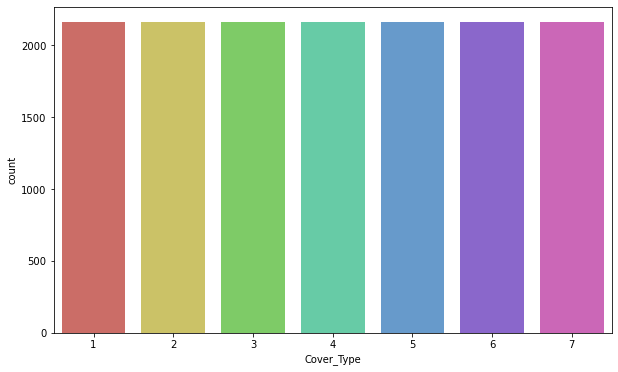

In [4]:
# plot the distribution of the target variable
plt.figure(figsize=(10,6))
sns.countplot(x='Cover_Type', data=train_data, palette='hls')
plt.show()


The data is composed of 15120 observations and 56 features. The target variable is the Cover_Type. The data is balanced. Now let's look at the data more closely.
We are going to separate the data into 2 parts: the numerical data and the categorical data. We will then look at the distribution of the numerical data and the distribution of the categorical data.

In [5]:
train_data = train_data.iloc[:,1:]

# extract all numerical features from train
num_features = train_data.iloc[:,:10].copy()

# extract all binary features from train
cat_features = train_data.iloc[:, 10:-1].copy()

# split cat_features
wild_data, soil_data = cat_features.iloc[:,:4].copy(), cat_features.iloc[:,4:].copy()

# train target variables
X_train = train_data.iloc[:, :-1].copy()
Y_train = train_data['Cover_Type']

## 1.1 Exploration of numerical variable

Fisrt, we have a quick look at the numerical data. We can see that the numerical data are all continuous variables. We can also see that the numerical data are all on the same scale. We will therefore not need to scale the data.

In [6]:
num_features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,1527.357804
std,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,1116.636997
min,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,0.000000
25%,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,750.000000
50%,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,1266.000000
75%,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,2002.000000
max,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,7095.000000


As we can see the numerical variables are in a different scale. We will have to scale them before training our model. What's about their distribution ? Let's have a look.

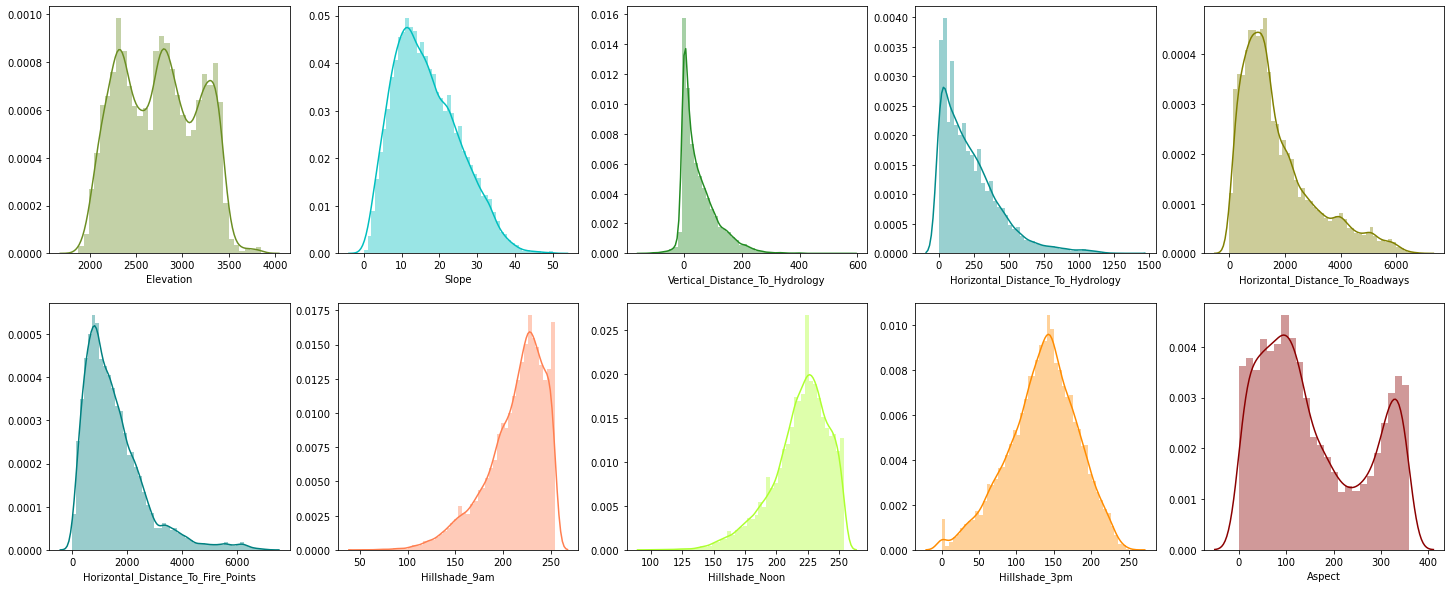

In [7]:
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col)

f = plt.figure(figsize=(25,10))
f.add_subplot(251)
histPlot(train_data['Elevation'],'olivedrab')
f.add_subplot(252)
histPlot(train_data['Slope'],'c')
f.add_subplot(253)
histPlot(train_data['Vertical_Distance_To_Hydrology'],'forestgreen')
f.add_subplot(254)
histPlot(train_data['Horizontal_Distance_To_Hydrology'],'darkcyan')
f.add_subplot(255)
histPlot(train_data['Horizontal_Distance_To_Roadways'],'olive')
f.add_subplot(256)
histPlot(train_data['Horizontal_Distance_To_Fire_Points'],'teal')
f.add_subplot(257)
histPlot(train_data['Hillshade_9am'],'coral')
f.add_subplot(258)
histPlot(train_data['Hillshade_Noon'],'greenyellow')
f.add_subplot(259)
histPlot(train_data['Hillshade_3pm'],'darkorange')
f.add_subplot(2,5,10)
histPlot(train_data['Aspect'],'darkred')

The majority of the distributions are skewed. It is the case for the columns `Slope`, `Horizontal_Distance_To_Hydrology`, `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Hillshade_9am`, `Hillshade_Noon`, `Hillshade_3pm`, `Horizontal_Distance_To_Fire_Points`. Perhaps we will have to transform them to make them more symmetrical.

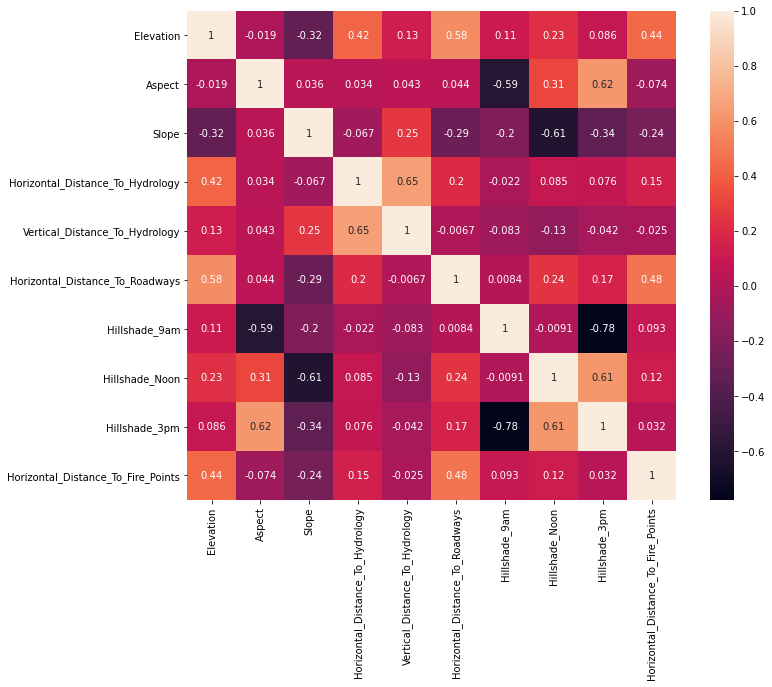

In [8]:
# correlation matrix sns
corrmat = num_features.corr()
plt.subplots(figsize=(12,9))
# write value on each square
sns.heatmap(corrmat, square=True, annot=True)

> Comments:

# 1.2 Exploration of the categorical features

> Comments:

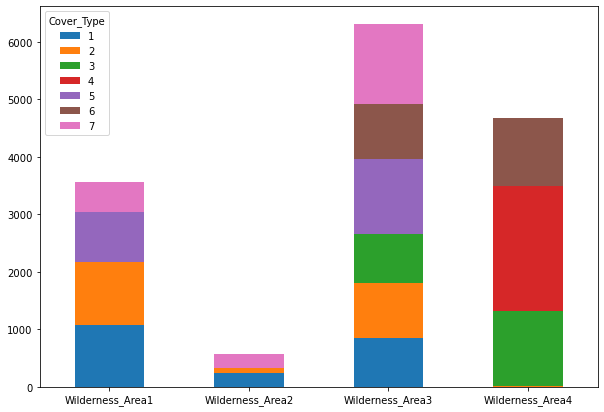

In [9]:
# Group the wilderness by Covertypes
wild_data['Cover_Type'] = Y_train.values
wild_data.groupby('Cover_Type').sum().T.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xticks(rotation=0)
plt.show()

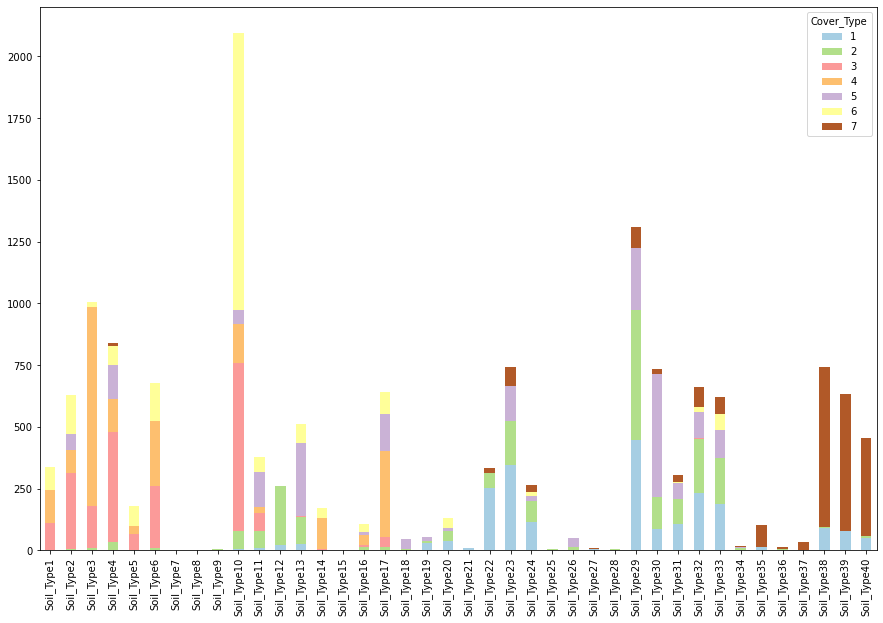

In [10]:
# Group soil types by Covertypes
soil_data['Cover_Type'] = Y_train.values
soil_data.groupby('Cover_Type').sum().T.plot(kind='bar', figsize=(15,10), stacked=True, colormap='Paired')
plt.xticks(rotation=90)
plt.show()

> Comments:

# 2. PCA analysis with numerical features

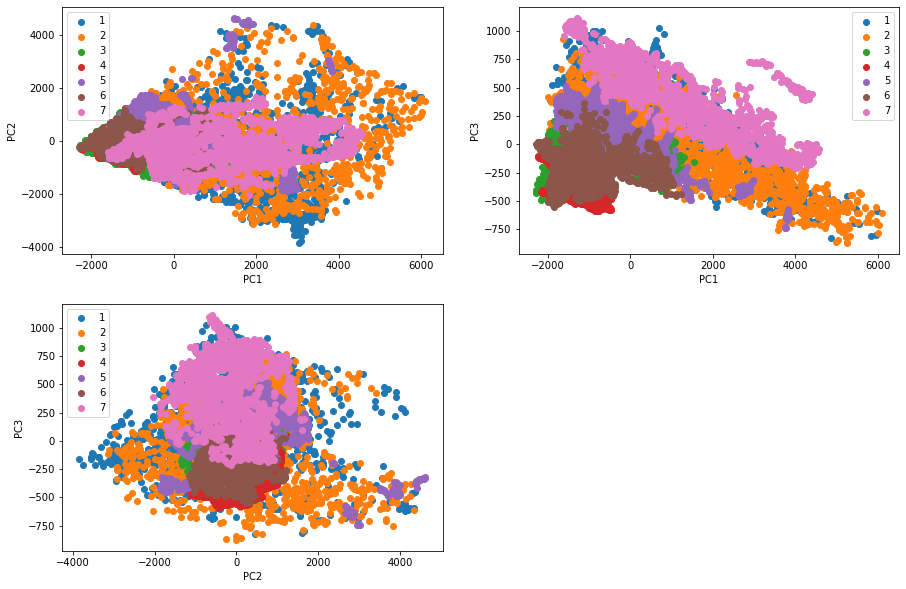

In [11]:
pca = PCA(n_components=3)
pca.fit(X_train)
num_features_pca = pca.transform(X_train)

# with the legend
fig = plt.figure(figsize=(15,10))

# project on all the 2D combinations (PC1, PC2) (PC1, PC3) (PC2, PC3)
ax1 = fig.add_subplot(221)
for i in range(1,8):
    ax1.scatter(num_features_pca[Y_train==i,0], num_features_pca[Y_train==i,1], label=i)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()

ax2 = fig.add_subplot(222)
for i in range(1,8):
    ax2.scatter(num_features_pca[Y_train==i,0], num_features_pca[Y_train==i,2], label=i)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax2.legend()

ax3 = fig.add_subplot(223)
for i in range(1,8):
    ax3.scatter(num_features_pca[Y_train==i,1], num_features_pca[Y_train==i,2], label=i)
ax3.set_xlabel('PC2')
ax3.set_ylabel('PC3')
ax3.legend()

plt.show()


> Comments: 

# Feature engineering

[ Based on the previous analysis, we will now create new features that will be used for the prediction model. To correct the skewness of the data, we will use the log transformation. First, we are going to normalise the numerical features and then we will create new features based on the categorical features. ]

In [12]:
# Create new features
X_train['Binned_Elevation'] = [np.floor(v/50.0) for v in X_train['Elevation']]
sub_data['Binned_Elevation'] = [np.floor(v/50.0) for v in sub_data['Elevation']]


X_train['Euclidian_Distance_To_Hydrology'] = (X_train['Horizontal_Distance_To_Hydrology']**2 + 
                                                            X_train['Vertical_Distance_To_Hydrology']**2)**0.5
sub_data['Euclidian_Distance_To_Hydrology'] = (sub_data['Horizontal_Distance_To_Hydrology']**2 +
                                                            sub_data['Vertical_Distance_To_Hydrology']**2)**0.5

X_train["Elevation_Hydrology_1"] = X_train["Elevation"] + X_train["Vertical_Distance_To_Hydrology"]
X_train["Elevation_Hydrology_2"] = X_train["Elevation"] - X_train["Vertical_Distance_To_Hydrology"]

sub_data["Elevation_Hydrology_1"] = sub_data["Elevation"] + sub_data["Vertical_Distance_To_Hydrology"]
sub_data["Elevation_Hydrology_2"] = sub_data["Elevation"] - sub_data["Vertical_Distance_To_Hydrology"]



In [13]:
# Normalization of selected columns
cols_to_normalize = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
                    'Euclidian_Distance_To_Hydrology', 'Elevation_Hydrology_1', 'Elevation_Hydrology_2']

X_train[cols_to_normalize] = normalize(X_train[cols_to_normalize])
sub_data[cols_to_normalize] = normalize(sub_data[cols_to_normalize])

In [14]:
X_train['Horizontal_Distance_To_Roadways_log'] = [np.log(v+1) for v in X_train['Horizontal_Distance_To_Roadways']]
sub_data['Horizontal_Distance_To_Roadways_log'] = [np.log(v+1) for v in sub_data['Horizontal_Distance_To_Roadways']]

In [15]:
#Features to be removed before the model
rem=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

#Remove the features from train and test
X_train=X_train.drop(rem,axis=1)
sub_data=sub_data.drop(rem,axis=1)

# Creation of the repartition of the data

Accordind to the PCA analysis,

In [16]:
# X_train split
X_train_full = X_train.copy()
X_train_1_2 = X_train[(train_data['Cover_Type'] <= 2)]
X_train_3_4_6 = X_train[(train_data['Cover_Type'].isin([3,4,6]))]

# Y_train split
Y_train_full = Y_train.copy()
Y_train_1_2 = Y_train[(train_data['Cover_Type'] <= 2)]
Y_train_3_4_6 = Y_train[(train_data['Cover_Type'].isin([3,4,6]))]

# sub_data Ids
sub_ids = sub_data['Id']

# Creation of the prediction model

We choose to use a random forest model because it is a robust model that can handle outliers and non-linear data. We will use the grid search method to find the best parameters for the model.

In [17]:
# Cross validation for the three models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=4, shuffle=True, random_state=0)
n_estimators = [100, 200, 300, 400, 500, 600]

# ExtraTreesClassifier for the full dataset
clf_full = GridSearchCV(ensemble.ExtraTreesClassifier(), {'n_estimators': n_estimators}, cv=cv, scoring='accuracy')
clf_full.fit(X_train_full, Y_train_full)
print('Best score for full dataset:', clf_full.best_score_)
print('Best n_estimators for full dataset:', clf_full.best_params_['n_estimators'])

# ExtraTreesClassifier for the first two classes
clf_1_2 = GridSearchCV(ensemble.RandomForestClassifier(), {'n_estimators': n_estimators}, cv=cv, scoring='accuracy')
clf_1_2.fit(X_train_1_2, Y_train_1_2)
print('Best score for first two classes:', clf_1_2.best_score_)
print('Best n_estimators for first two classes:', clf_1_2.best_params_['n_estimators'])

# ExtraTreesClassifier for the last three classes
clf_3_4_6 = GridSearchCV(ensemble.RandomForestClassifier(), {'n_estimators': n_estimators}, cv=cv, scoring='accuracy')
clf_3_4_6.fit(X_train_3_4_6, Y_train_3_4_6)
print('Best score for last three classes:', clf_3_4_6.best_score_)
print('Best n_estimators for last three classes:', clf_3_4_6.best_params_['n_estimators'])

Best score for full dataset: 0.8849206349206349
Best n_estimators for full dataset: 400
Best score for first two classes: 0.8217592592592593
Best n_estimators for first two classes: 600
Best score for last three classes: 0.9070987654320988
Best n_estimators for last three classes: 400


Combine the classifiers by updating the weights of the classifiers based on their accuracy on the validation set.

In [18]:
def largest_index(inlist):
  largest = -1
  largest_index = 0
  for i in range(len(inlist)):
    item = inlist[i]
    if item > largest:
      largest = item
      largest_index = i
  return largest_index

def predict(X, Y=None, weights=[1.1, 1.1, 3.0, 4.0, 3.0], register=False, register_file='register.csv'):
  vals = {}
  vals_1_2 = {}
  vals_3_4_6 = {}

  for e, val in enumerate(clf_1_2.predict_proba(X)):
    vals_1_2[e] = val

  for e, val in enumerate(clf_3_4_6.predict_proba(X)):
    vals_3_4_6[e] = val

  for e, val in enumerate(clf_full.predict_proba(X)):
    vals[e] = val
  
  predictions = []
  for e, val in enumerate(list(clf_full.predict_proba(X))):
    #boost types 1 and 2
    val[0] += vals_1_2[e][0]/1.3
    val[1] += vals_1_2[e][1]/1.1
    #boost types 3,4, and 6
    val[2] += vals_3_4_6[e][0]/3.4
    val[3] += vals_3_4_6[e][1]/4.0
    val[5] += vals_3_4_6[e][2]/3.6
    i = largest_index(val)
    v = i  + 1
    predictions.append(v)

  if register:
    df = pd.DataFrame({'Id': range(1, len(X)+1), 'Cover_Type': predictions})
    df.to_csv(register_file, index=False)
  if Y is not None:
    score = accuracy_score(Y, predictions)
    print('Accuracy score:', score)

In [19]:
predict(X_train, Y_train)

Accuracy score: 1.0


In [20]:
sub_data = sub_data.drop('Id', axis=1)
predict(sub_data, register=True, register_file='register.csv')